In [2]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#importa as colunas de interesse e transforam em iteráveis
df = pd.read_csv('metroetrem_sp.csv')
lista_cores_linhas0 = df.nome_lin
lista_nome_estacoes = df.estacao_upp
lista_link = df.link
lista_long = df.long
lista_lat = df.lat

nomes_linhas = list(set(lista_cores_linhas0))

In [4]:
# muda as cores para inglês, pois é usado na coloração do grafo
lista_cores_linhas = lista_cores_linhas0.copy()

for indice, cor in enumerate(lista_cores_linhas):
    if cor == 'LILAS':
        lista_cores_linhas[indice] = 'blueviolet'
    if cor == 'SAFIRA':
        lista_cores_linhas[indice] = 'royalblue'
    if cor == 'RUBI':
        lista_cores_linhas[indice] = 'mediumvioletred'
    if cor == 'CORAL':
        lista_cores_linhas[indice] = 'tomato'
    if cor == 'JADE':
        lista_cores_linhas[indice] = 'mediumaquamarine'
    if cor == 'TURQUESA':
        lista_cores_linhas[indice] = 'turquoise'
    if cor == 'AMARELA':
        lista_cores_linhas[indice] = 'yellow'
    if cor == 'PRATA':
        lista_cores_linhas[indice] = 'lightgray'
    if cor == 'DIAMANTE':
        lista_cores_linhas[indice] = 'lightslategray'
    if cor == 'ESMERALDA':
        lista_cores_linhas[indice] = 'palegreen'
    if cor == 'AZUL':
        lista_cores_linhas[indice] = 'darkblue'
    if cor == 'VERDE':
        lista_cores_linhas[indice] = 'mediumseagreen'
    elif cor == 'VERMELHA':
        lista_cores_linhas[indice] = 'firebrick'

### Cria uma lista com as estacoes

Nesse bloco é criada a lista ```estacoes```, formada por tuplas de primeiro valor o nome da estacao e segundo valor um dict com os atributos da estação: cor da linha e conexoes.


In [5]:
estacoes = []
estacoes_adicionadas = []

for indice, cor in enumerate(lista_cores_linhas):
        
    # esse if evita criar self loops para as últimas estações de cada linha
    if lista_nome_estacoes[indice] == lista_link[indice]:
        estacoes.append((lista_nome_estacoes[indice],{'cor':lista_cores_linhas[indice],'conexao': [],'pos':(lista_long[indice],lista_lat[indice])}))
        estacoes_adicionadas.append(lista_nome_estacoes[indice])

    elif lista_nome_estacoes[indice] in estacoes_adicionadas:
        #localiza o indice da estação que ja esta repetida e adiciona apenas uma nova conexao
        index = estacoes_adicionadas.index(lista_nome_estacoes[indice])
        estacoes[index][1]['conexao'] += [lista_link[indice]]
        
    else:
        estacoes.append((lista_nome_estacoes[indice],{'cor':lista_cores_linhas[indice],'conexao':[]+[lista_link[indice]],'pos':(lista_long[indice],lista_lat[indice])}))
        estacoes_adicionadas.append(lista_nome_estacoes[indice])
    

### Criando o grafo

In [6]:
from pprint import pprint
import networkx as nx

In [7]:
# cria o grafo
metro = nx.Graph()

#### Cria os nós e arestas de cada linha

In [8]:
#adiciona os nós 
metro.add_nodes_from(estacoes)

#adiciona as arestas
for estacao in estacoes:
    for link in estacao[1]['conexao']:
        metro.add_edge(estacao[0], link)


#### Cria mapa de cor para cada estação assumir a cor de sua linha

In [9]:
#cria mapa de cores para os nós
color_map = []
cores = nx.get_node_attributes(metro,'cor')

for estacao in metro:
    color_map.append(cores[estacao])

#### Visualização do Grafo

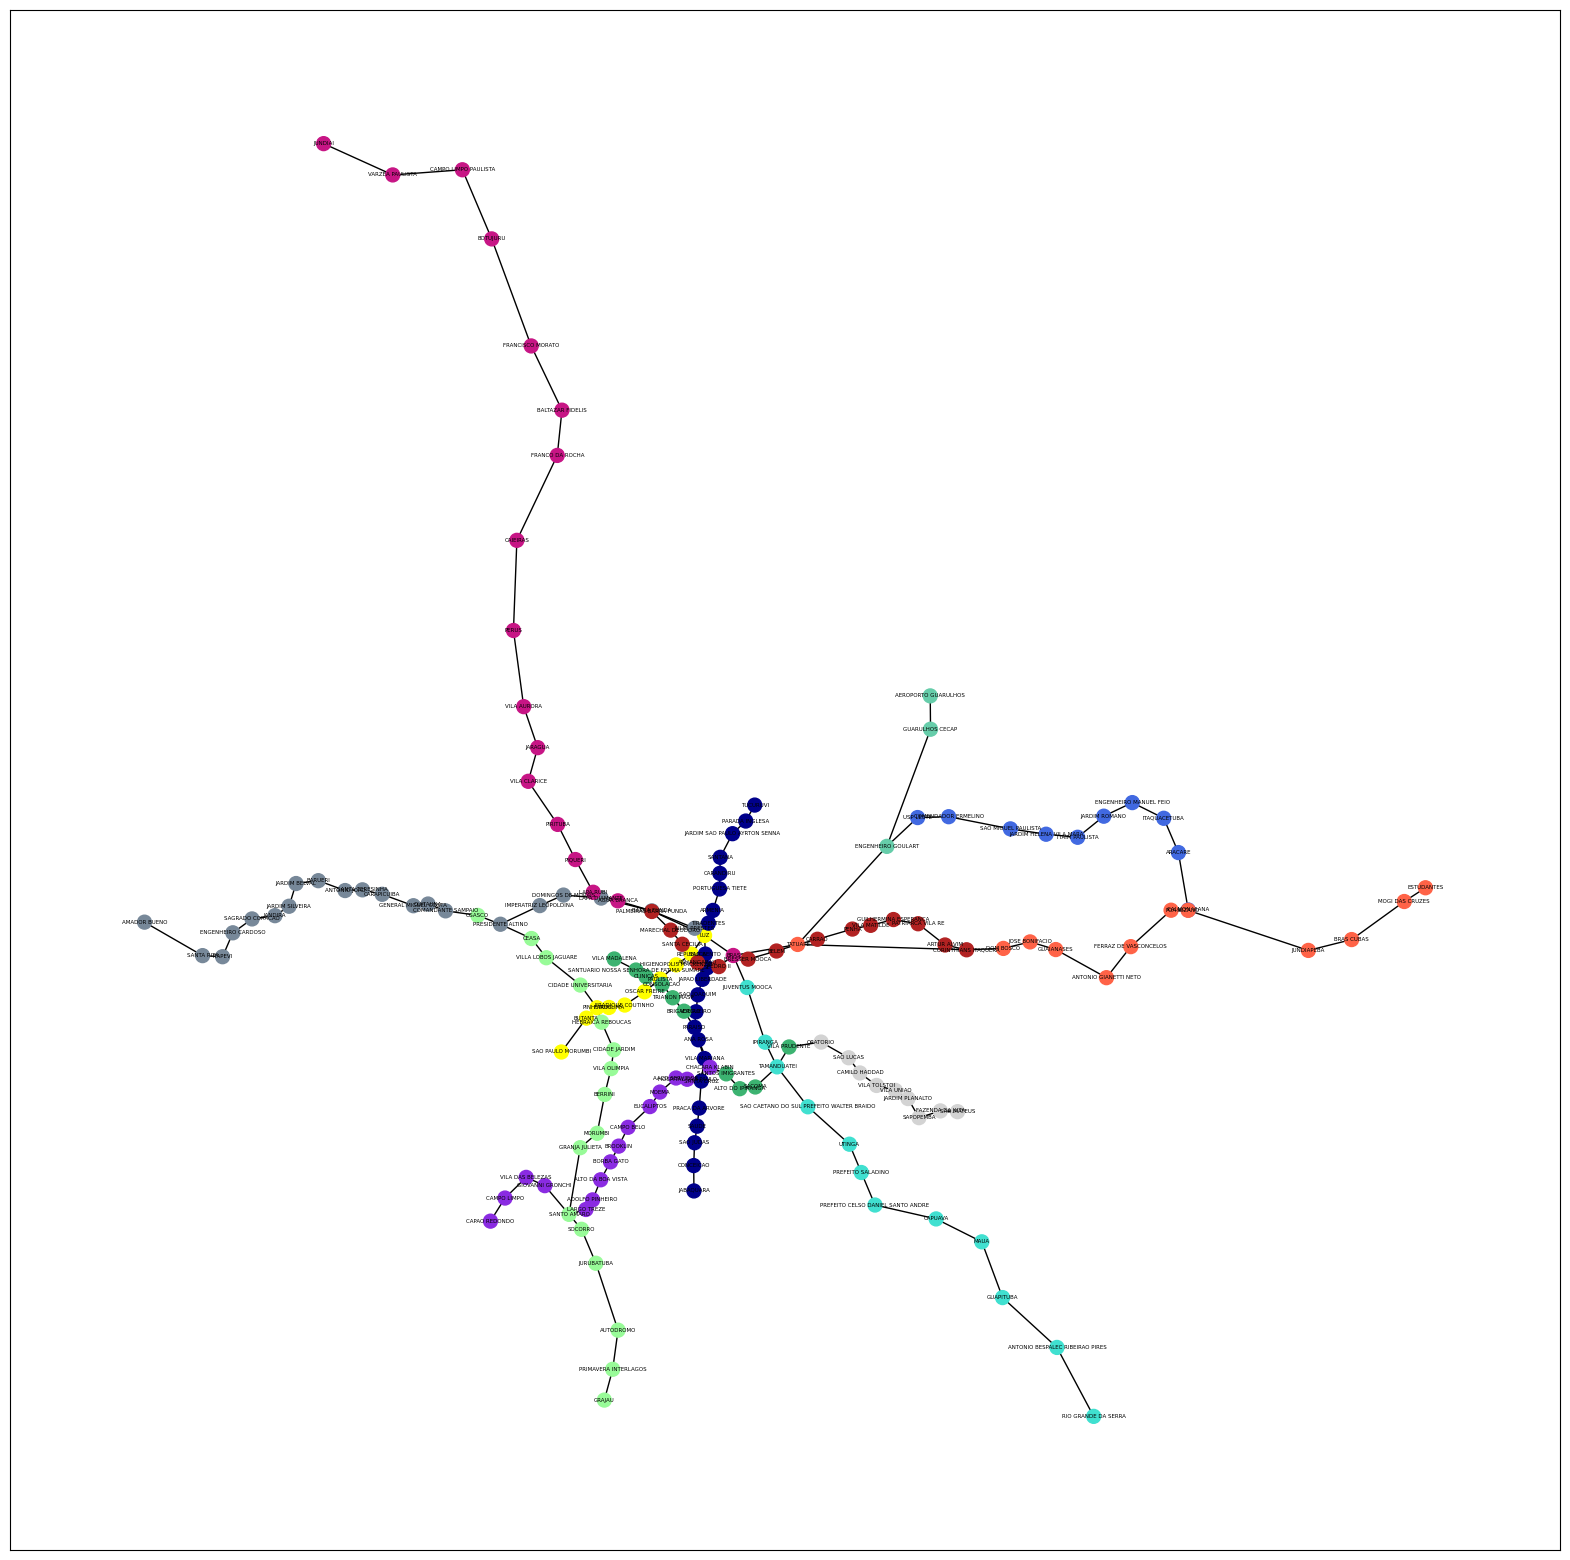

In [12]:
#visualizar grafo
plt.figure(figsize=(20,20))
position = nx.spring_layout(metro, seed=20)
nx.draw_networkx(metro, nx.get_node_attributes(metro, 'pos'), node_color=color_map, node_size=100, font_size=4)

#### Calcula o menor caminho entre duas estações

In [11]:
nx.shortest_path(metro, source='PORTUGUESA TIETE', target='AEROPORTO GUARULHOS', method='dijkstra')

['PORTUGUESA TIETE',
 'ARMENIA',
 'TIRADENTES',
 'LUZ',
 'BRAS',
 'TATUAPE',
 'ENGENHEIRO GOULART',
 'GUARULHOS CECAP',
 'AEROPORTO GUARULHOS']